<a href="https://colab.research.google.com/github/NikhilNamal17/ai-calorie-tracker/blob/master/Calorie_Tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

import tensorflow as tf
import matplotlib.image as img
%matplotlib inline
import numpy as np
from collections import defaultdict
import collections
from shutil import copy
from shutil import copytree, rmtree
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import zipfile
import os
import random
import tensorflow.keras.backend as K
from tensorflow.keras import regularizers
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, CSVLogger
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import models
import cv2



In [0]:
# Check if GPU is enabled
print(tf.__version__)
print(tf.test.gpu_device_name())

2.2.0
/device:GPU:0


In [0]:
#Unzipping file
with zipfile.ZipFile("drive/My Drive/datasets.zip","r") as zip_ref:
    zip_ref.extractall()

In [6]:
import glob
food = ['dosa','idli','pav_bhaji','samosa','vada_pav'] 

f_dosa = glob.glob('datasets/train_data_mc/Dosa/*')
f_idli = glob.glob('datasets/train_data_mc/Idli/*')
f_pav_bhaji = glob.glob('datasets/train_data_mc/Pav Bhaji/*')
f_samosa = glob.glob('datasets/train_data_mc/Samosa/*')
f_vada_pav = glob.glob('datasets/train_data_mc/Vada Pav/*')


f_dosa_test = glob.glob('datasets/test_data_mc/Dosa/*')
f_idli_test = glob.glob('datasets/test_data_mc/Idli/*')
f_pav_bhaji_test = glob.glob('datasets/test_data_mc/Pav Bhaji/*')
f_samosa_test = glob.glob('datasets/test_data_mc/Samosa/*')
f_vada_pav_test = glob.glob('datasets/test_data_mc/Vada Pav/*')


# total 1000 files for each category
print('Number of images per class:\n\t \ttrain\ttest \n Dosa:\t\t{}\t{}\n Idli:\t\t{}\t{}\n Pav Bhaji:\t{}\t{}\n Samosa:\t{}\t{}  \n Vada Pav:\t{}\t{}'
      .format(len(f_dosa),len(f_dosa_test),
              len(f_idli),len(f_idli_test),
              len(f_pav_bhaji),len(f_pav_bhaji_test),
              len(f_samosa),len(f_samosa_test),
              len(f_vada_pav),len(f_vada_pav_test)))

Number of images per class:
	 	train	test 
 Dosa:		464	204
 Idli:		299	163
 Pav Bhaji:	100	72
 Samosa:	240	189  
 Vada Pav:	84	64


In [0]:
K.clear_session()
n_classes = 5
img_width, img_height = 299, 299
train_data_dir = 'datasets/train_data_mc'
validation_data_dir = 'datasets/test_data_mc'
nb_train_samples = 2250 #75750
nb_validation_samples = 750 #25250
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')


inception = InceptionV3(weights='imagenet', include_top=False)
x = inception.output
x = GlobalAveragePooling2D()(x)
x = Dense(128,activation='relu')(x)
x = Dropout(0.2)(x)

predictions = Dense(5,kernel_regularizer=regularizers.l2(0.005), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=predictions)
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='best_model_5class.hdf5', verbose=1, save_best_only=True)
csv_logger = CSVLogger('history_5class.log')

history = model.fit_generator(train_generator,
                    steps_per_epoch = nb_train_samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=nb_validation_samples // batch_size,
                    epochs=50,
                    verbose=1,
                    callbacks=[csv_logger, checkpointer])
# tf.saved_model.save(model, export_dir="/tmp/saved_model", signatures=None)

model.save('model_trained_5class.hdf5')

In [8]:
class_map_5 = train_generator.class_indices
class_map_5

{'Dosa': 0, 'Idli': 1, 'Pav Bhaji': 2, 'Samosa': 3, 'Vada Pav': 4}

In [0]:
def plot_accuracy(history,title):
    plt.title(title)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
def plot_loss(history,title):
    plt.title(title)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()


In [0]:
plot_accuracy(history,'FOOD101-Inceptionv3')
plot_loss(history,'FOOD101-Inceptionv3')

In [9]:
%%time
# Loading the best saved model to make predictions
K.clear_session()
model_best = load_model('/content/drive/My Drive/model_trained_5class.hdf5',compile = False)

CPU times: user 5.62 s, sys: 226 ms, total: 5.85 s
Wall time: 5.86 s


In [0]:
food_list = ['dosa','idli','pav_bhaji','samosa','vada_pav'] 

def predict_class(model, images, show = True):
  for img in images:
    img = image.load_img(img, target_size=(299, 299))
    img = image.img_to_array(img)                    
    img = np.expand_dims(img, axis=0)         
    img /= 255.   
                                     

    pred = model.predict(img)
    print("preddict", pred)
    index = np.argmax(pred)
    food_list.sort()
    print("Sorted ", food_list)
    pred_value = food_list[index]
    print("index pred", pred_value)
    if show:
        plt.imshow(img[0])                           
        plt.axis('off')
        plt.title(pred_value)
        plt.show()

image [[[[0.07843138 0.07058824 0.11372549]
   [0.07843138 0.07058824 0.11372549]
   [0.07843138 0.07058824 0.11372549]
   ...
   [0.09411765 0.0627451  0.05490196]
   [0.09411765 0.0627451  0.05490196]
   [0.09411765 0.0627451  0.05490196]]

  [[0.07843138 0.07058824 0.11372549]
   [0.07843138 0.07058824 0.11372549]
   [0.07843138 0.07058824 0.11372549]
   ...
   [0.09411765 0.0627451  0.05490196]
   [0.09411765 0.0627451  0.05490196]
   [0.09411765 0.0627451  0.05490196]]

  [[0.07843138 0.07058824 0.11372549]
   [0.07843138 0.07058824 0.11372549]
   [0.07843138 0.07058824 0.11372549]
   ...
   [0.09411765 0.0627451  0.05490196]
   [0.09411765 0.0627451  0.05490196]
   [0.09411765 0.0627451  0.05490196]]

  ...

  [[0.16470589 0.07058824 0.03137255]
   [0.16470589 0.07058824 0.03137255]
   [0.16470589 0.07058824 0.03137255]
   ...
   [0.53333336 0.5803922  0.63529414]
   [0.53333336 0.5803922  0.63529414]
   [0.53333336 0.5803922  0.63529414]]

  [[0.16470589 0.07058824 0.03137255]
 

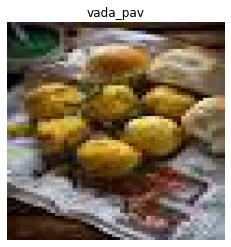

image [[[[0.59607846 0.04705882 0.        ]
   [0.59607846 0.04705882 0.        ]
   [0.5921569  0.04313726 0.        ]
   ...
   [0.5647059  0.18039216 0.08235294]
   [0.6117647  0.22745098 0.12941177]
   [0.6666667  0.28235295 0.18431373]]

  [[0.59607846 0.04705882 0.        ]
   [0.59607846 0.04705882 0.        ]
   [0.5921569  0.04313726 0.        ]
   ...
   [0.5647059  0.18039216 0.08235294]
   [0.6117647  0.22745098 0.12941177]
   [0.6666667  0.28235295 0.18431373]]

  [[0.6156863  0.03921569 0.01176471]
   [0.6156863  0.03137255 0.00784314]
   [0.6156863  0.03137255 0.00784314]
   ...
   [0.57254905 0.18431373 0.09411765]
   [0.57254905 0.18431373 0.09411765]
   [0.5686275  0.18039216 0.09019608]]

  ...

  [[0.4862745  0.28235295 0.12941177]
   [0.49411765 0.3137255  0.18039216]
   [0.54901963 0.40784314 0.30588236]
   ...
   [0.8509804  0.7647059  0.67058825]
   [0.84313726 0.75686276 0.6627451 ]
   [0.83137256 0.74509805 0.6509804 ]]

  [[0.4627451  0.25882354 0.10588235]
 

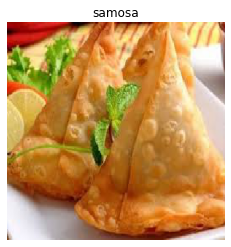

image [[[[0.7137255  0.7254902  0.65882355]
   [0.7137255  0.7254902  0.65882355]
   [0.7019608  0.70980394 0.654902  ]
   ...
   [0.9372549  0.9411765  0.87058824]
   [0.9372549  0.9411765  0.87058824]
   [0.9372549  0.9411765  0.87058824]]

  [[0.7607843  0.77254903 0.7058824 ]
   [0.7607843  0.77254903 0.7058824 ]
   [0.69411767 0.7019608  0.64705884]
   ...
   [0.9372549  0.9411765  0.8784314 ]
   [0.9372549  0.9411765  0.8862745 ]
   [0.9372549  0.9411765  0.8862745 ]]

  [[0.70980394 0.72156864 0.654902  ]
   [0.70980394 0.72156864 0.654902  ]
   [0.75686276 0.7647059  0.70980394]
   ...
   [0.9372549  0.9372549  0.8901961 ]
   [0.9372549  0.9372549  0.8980392 ]
   [0.9372549  0.9372549  0.8980392 ]]

  ...

  [[0.7254902  0.69803923 0.63529414]
   [0.7254902  0.69803923 0.63529414]
   [0.73333335 0.7058824  0.6431373 ]
   ...
   [0.5411765  0.5372549  0.5176471 ]
   [0.53333336 0.5294118  0.50980395]
   [0.53333336 0.5294118  0.50980395]]

  [[0.7176471  0.6901961  0.627451  ]
 

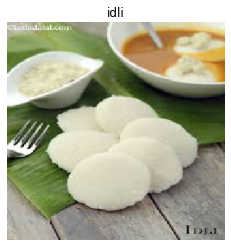

image [[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[0.8666667  0.8666667  0.8745098 ]
   [0.87058824 0.87058824 0.8784314 ]
   [0.87058824 0.87058824 0.8784314 ]
   ...
   [0.9490196  0.94509804 0.96862745]
   [0.9490196  0.94509804 0.96862745]
   [0.9529412  0.9490196  0.972549  ]]

  [[0.8666667  0.8666667  0.8745098 ]
 

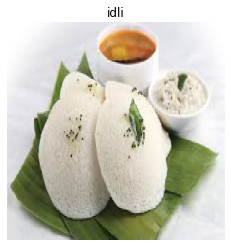

In [11]:
images = []
images.append('/content/drive/My Drive/vadapav_images___Google_Search/2Q__ (1).jpg')
# # images.append('dosa.jpg')
images.append('samosa.jpg') 
# images.append('pavbhaji.jpg')
images.append('/content/drive/My Drive/idli_images___Google_Search/9k_ (6).jpg')
images.append('/content/drive/My Drive/idli_images___Google_Search/images (18).jpg')
predict_class(model_best, images, True)

In [0]:
!pip install flask-ngrok



In [20]:
# from flask_ngrok import run_with_ngrok
from tensorflow.keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from PIL import Image
import numpy as np
import flask
import io

# initialize our Flask application and the Keras model
app = flask.Flask(__name__)
# run_with_ngrok(app)

def loadmodel():
    # load the pre-trained Keras model (here we are using a model
    # pre-trained on ImageNet and provided by Keras, but you can
    # substitute in your own networks just as easily)
    global model
    model = load_model('/content/drive/My Drive/model_trained_5class.hdf5',compile = False)

def prepare_image(image, target):
    # if the image mode is not RGB, convert it
    if image.mode != "RGB":
        image = image.convert("RGB")

    # resize the input image and preprocess it
    image = image.resize(target)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    image /= 255.

    # return the processed image
    return image

def predict_class(model, images, show = True):
  food_list = ['dosa','idli','pav_bhaji','samosa','vada_pav']
  # images /= 255.
  pred = model.predict(images)
  # print("Pred ", pred)
  index = np.argmax(pred)
  # print("index ", index)
  food_list.sort()
  pred_value = food_list[index]

  return pred_value



@app.route('/', methods=['GET'])
def home():
    return "<h1>Ai Calorie Tracker</h1><p>This site is a prototype API for tracking your food calories</p>"


@app.route("/predict", methods=["POST"])
def predict():
    # initialize the data dictionary that will be returned from the
    # view
    data = {"success": False}

    # ensure an image was properly uploaded to our endpoint
    if flask.request.method == "POST":
        if flask.request.files.get("image"):
            # read the image in PIL format
            image = flask.request.files["image"].read()
            
            image = Image.open(io.BytesIO(image))
            

            # preprocess the image and prepare it for classification
            image = prepare_image(image, target=(299, 299))
           

            response = predict_class(model, image, True)

            # classify the input image and then initialize the list
            # of predictions to return to the client
            data["predictions"] = [response]


            # indicate that the request was a success
            data["success"] = True

    # return the data dictionary as a JSON response
    return flask.jsonify(data)

if __name__ == "__main__":
    print(("* Loading Keras model and Flask starting server..."
        "please wait until server has fully started"))
    loadmodel()
    app.run()


* Loading Keras model and Flask starting server...please wait until server has fully started
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://e31101bdb631.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [07/Jun/2020 11:54:44] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Jun/2020 11:54:47] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [07/Jun/2020 11:55:59] "GET /predict HTTP/1.1" 405 -
127.0.0.1 - - [07/Jun/2020 11:57:04] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [07/Jun/2020 11:57:17] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [07/Jun/2020 11:59:01] "POST /predict HTTP/1.1" 200 -
